# Título: Análisis de grafos para fjujos migratorios

### Miembros: Pablo Revuelta Stobbs, Matías Corredoira

### Fecha: 15/01/2021

### EDA 

Para este trabajo se coge una base de datos perteneciente a la OCDE par obtener los datos que reflejan diferentes flujos migratorios para un periodo de 20 años.

Data to do a grafo analysis of the migration inflows, giving information of the nationality of the migrators.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd

In [2]:
file1 = '../data/MIG_28122020_migration_inflows.csv'

In [3]:
migration = pd.read_csv(file1)

C:\Users\matia\Anaconda3\envs\migration_flows\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
migration.head()

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags
0,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2000,2000,887.0,NaN,NaN
1,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2001,2001,456.0,NaN,NaN
2,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2002,2002,660.0,NaN,NaN
3,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2003,2003,1015.0,NaN,NaN
4,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2004,2004,1340.0,NaN,NaN


In [5]:
migration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477776 entries, 0 to 477775
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CO2                           477776 non-null  object 
 1   Country of birth/nationality  477776 non-null  object 
 2   VAR                           477776 non-null  object 
 3   Variable                      477776 non-null  object 
 4   GEN                           477776 non-null  object 
 5   Gender                        477776 non-null  object 
 6   COU                           477776 non-null  object 
 7   Country                       477776 non-null  object 
 8   YEA                           477776 non-null  int64  
 9   Year                          477776 non-null  int64  
 10  Value                         477749 non-null  float64
 11  Flag Codes                    27 non-null      object 
 12  Flags                         27 non-null   

In [6]:
migration.CO2.unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS',
       'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ',
       'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR',
       'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD', 'CHL',
       'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB',
       'CYP', 'CZE', 'PRK', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU',
       'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FJI', 'FIN', 'CSK',
       'SUN', 'YUCS', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC',
       'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG',
       'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA',
       'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'KOR', 'KWT', 'KGZ',
       'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX',
       'MAC', 'MKD', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL',
       'MRT', 'MUS', 'MEX', 'FSM', 'MDA', 'MCO', 'MNG', 'MNE', 'MAR',
       'MOZ', 'MMR'

In [7]:
migration['Country of birth/nationality'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'Former Czechoslovakia',
       'Former USSR', 'Form

In [8]:
migration.VAR.unique()

array(['B11', 'B12', 'B14', 'B13', 'B15', 'B16'], dtype=object)

In [9]:
migration.Variable.unique()

array(['Inflows of foreign population by nationality',
       'Outflows of foreign population by nationality',
       'Stock of foreign-born population by country of birth',
       'Inflows of asylum seekers by nationality',
       'Stock of foreign population by nationality',
       'Acquisition of nationality by country of former nationality'],
      dtype=object)

In [10]:
migration.GEN.unique()

array(['TOT'], dtype=object)

In [11]:
migration.Gender.unique()

array(['Total'], dtype=object)

In [12]:
migration.COU.unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'SVK', 'ESP', 'SWE', 'CHE', 'TUR',
       'GBR', 'USA', 'CHL', 'EST', 'SVN', 'PRT', 'ISR', 'LVA'],
      dtype=object)

In [13]:
migration.Country.unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Kingdom', 'United States', 'Chile', 'Estonia', 'Slovenia',
       'Portugal', 'Israel', 'Latvia'], dtype=object)

In [14]:
migration.YEA.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [15]:
migration.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [16]:
migration['Flag Codes'].unique()

array([nan, 'e'], dtype=object)

In [17]:
migration.Flags.unique()

array([nan, 'Estimated value'], dtype=object)

In [18]:
migration_inflows_raw = migration[migration.Variable == 'Inflows of foreign population by nationality']

In [19]:
migration_inflows_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96045 entries, 0 to 475074
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CO2                           96045 non-null  object 
 1   Country of birth/nationality  96045 non-null  object 
 2   VAR                           96045 non-null  object 
 3   Variable                      96045 non-null  object 
 4   GEN                           96045 non-null  object 
 5   Gender                        96045 non-null  object 
 6   COU                           96045 non-null  object 
 7   Country                       96045 non-null  object 
 8   YEA                           96045 non-null  int64  
 9   Year                          96045 non-null  int64  
 10  Value                         96018 non-null  float64
 11  Flag Codes                    27 non-null     object 
 12  Flags                         27 non-null     object 
dtype

In [20]:
migration_inflows_raw['Country of birth/nationality'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'Former Czechoslovakia',
       'Former USSR', 'Form

In [21]:
migration_inflows_raw.CO2.unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS',
       'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ',
       'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR',
       'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD', 'CHL',
       'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB',
       'CYP', 'CZE', 'PRK', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU',
       'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FJI', 'FIN', 'CSK',
       'SUN', 'YUCS', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC',
       'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG',
       'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA',
       'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'KOR', 'KWT', 'KGZ',
       'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX',
       'MAC', 'MKD', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL',
       'MRT', 'MUS', 'MEX', 'FSM', 'MDA', 'MCO', 'MNG', 'MNE', 'MAR',
       'MOZ', 'MMR'

In [22]:
migration_inflows_raw.head()

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags
0,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2000,2000,887.0,NaN,NaN
1,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2001,2001,456.0,NaN,NaN
2,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2002,2002,660.0,NaN,NaN
3,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2003,2003,1015.0,NaN,NaN
4,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2004,2004,1340.0,NaN,NaN


In [23]:
index1 = migration_inflows_raw[migration_inflows_raw['CO2'] == "TOT"].index
index2 = migration_inflows_raw[migration_inflows_raw['CO2'] == "NS"].index
index3 = migration_inflows_raw[migration_inflows_raw['CO2'] == "UUU"].index
index4 = migration_inflows_raw[migration_inflows_raw['CO2'] == "YYY"].index

In [24]:
migration_inflows_raw.drop(index1, inplace = True)
migration_inflows_raw.drop(index2, inplace = True)
migration_inflows_raw.drop(index3, inplace = True)
migration_inflows_raw.drop(index4, inplace = True)

C:\Users\matia\Anaconda3\envs\migration_flows\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
migration_inflows_raw.CO2.unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS',
       'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ',
       'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR',
       'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD', 'CHL',
       'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB',
       'CYP', 'CZE', 'PRK', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU',
       'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FJI', 'FIN', 'CSK',
       'SUN', 'YUCS', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC',
       'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG',
       'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA',
       'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'KOR', 'KWT', 'KGZ',
       'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX',
       'MAC', 'MKD', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL',
       'MRT', 'MUS', 'MEX', 'FSM', 'MDA', 'MCO', 'MNG', 'MNE', 'MAR',
       'MOZ', 'MMR'

Selection of the countries from Europe that have inflows of foreign population

In [26]:
migration_inflows_raw = migration_inflows_raw[migration_inflows_raw['Country'].isin(['Austria', 'Belgium', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Luxembourg',
       'Netherlands', 'Norway', 'Poland',
       'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Kingdom', 'Estonia', 'Slovenia',
       'Portugal', 'Latvia'])]

In [27]:
migration_inflows_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67486 entries, 55 to 475074
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CO2                           67486 non-null  object 
 1   Country of birth/nationality  67486 non-null  object 
 2   VAR                           67486 non-null  object 
 3   Variable                      67486 non-null  object 
 4   GEN                           67486 non-null  object 
 5   Gender                        67486 non-null  object 
 6   COU                           67486 non-null  object 
 7   Country                       67486 non-null  object 
 8   YEA                           67486 non-null  int64  
 9   Year                          67486 non-null  int64  
 10  Value                         67460 non-null  float64
 11  Flag Codes                    26 non-null     object 
 12  Flags                         26 non-null     object 
dtyp

__EDA__:
- Analisis de variables:
  - Análisis de valores únicos con histogramas.
  - Correlaciones para ver si las variables de abajo tienen relación entre ellas.
  - Ver si Year y YEA difieren entre si, si no lo hacen eliminar YEA.
  - Ver Flag Codes y Flags que significan, valores nulos, si difieren entre ellas. Decidir si eliminar o no.
  - Ver VAR que significa, hacer un unique, solo da un valor B11 que corresponde a Variable, eliminar.
  - Ver variables relacionadas con Country of birth/nationality, CO2, Country, COU.
  - Ver variables GEN y gender

- Análisis EDA.
  - Análisis de nulos.
  - Análisis descriptivo exhaustivo de cada variable.
  - Histogramas.
    - Ver diferencia en cantidad de migraciónes entre los distintos años.
  - Scatterplot.
    - Ver países más visitados.
    - Ver nacionalidades que más visitan esos países.
    
  - Correlaciones.
  - Gráficas a tutiplen. De lo que sea q se nos vaya ocurriendo. para hacer analisis multivariable
  
Incluir una variable de coste que se especifique en terminos de km recorridos. (se podría intentar realizar a traves de una función que calcule de forma automática la distancia entre el orígen y el destino).

# EDA

## 1. Análisis de variables
Se ha observado en el análisis previo que existen variables que aportan un solo valor o que están repetidas.

Se procederá a realizar un breve análisis de dichas variables para decidir si es posible eliminarlas del dataset.

__Variables GEN y Gender__

In [28]:
migration_inflows_raw.GEN.unique()

array(['TOT'], dtype=object)

In [29]:
migration_inflows_raw.Gender.unique()

array(['Total'], dtype=object)

Se observa que ambos, GEN y Gender cuentan con un único valor (TOT y Total). Se interpreta que la variable GEN es una abreviación de la variable Gender.

Debido a que solo cuentan con un valor, se realizará un histograma para verificar esta información.

<AxesSubplot:xlabel='Gender', ylabel='Count'>

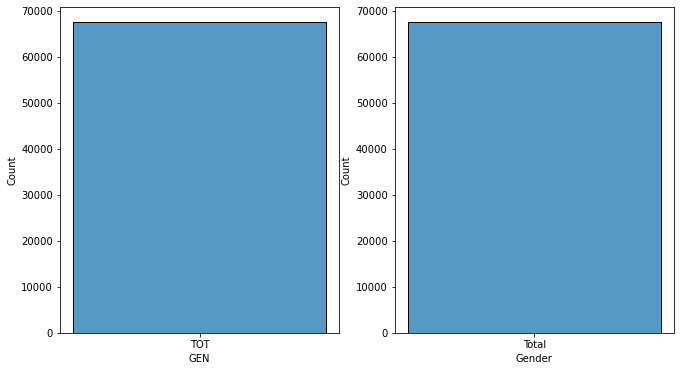

In [30]:
plt.figure(figsize=(11, 6))

plt.subplot(121)
sns.histplot(migration_inflows_raw.GEN)
plt.subplot(122)
sns.histplot(migration_inflows_raw.Gender)

Se observa que ambas tienen el mismo número de valores TOT y Total, por lo que se decide  eliminar ambas variables ya que no otorga información relevante.

__Variables YEA y Year__

In [31]:
migration_inflows_raw.YEA.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [32]:
migration_inflows_raw.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

Se aprecia que ambas variables muestran el año en el que se dan las migraciones. Se procede a analizar si estas variables están dando la misma información.

<AxesSubplot:xlabel='Year', ylabel='Count'>

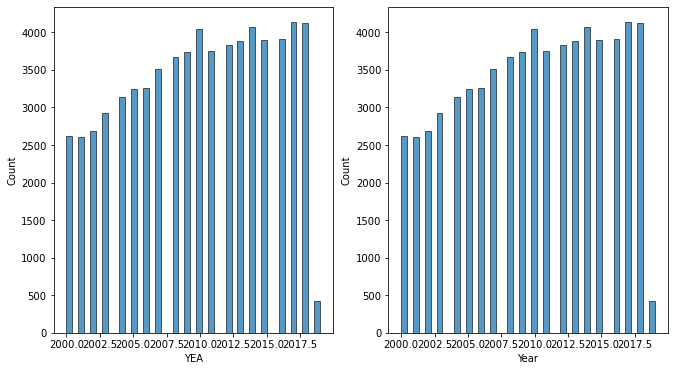

In [33]:
plt.figure(figsize=(11, 6))

plt.subplot(121)
sns.histplot(migration_inflows_raw.YEA)
plt.subplot(122)
sns.histplot(migration_inflows_raw.Year)

Para estas dos variables se percibe que ambas tienen los mismos valores, por lo que se decide eliminar la variable YEA.

__Variables CO2 y Country of birth/nationality__

In [34]:
migration_inflows_raw.CO2.unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS',
       'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ',
       'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR',
       'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD', 'CHL',
       'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB',
       'CYP', 'CZE', 'PRK', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU',
       'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FJI', 'FIN', 'CSK',
       'SUN', 'YUCS', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC',
       'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG',
       'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA',
       'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'KOR', 'KWT', 'KGZ',
       'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX',
       'MAC', 'MKD', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL',
       'MRT', 'MUS', 'MEX', 'FSM', 'MDA', 'MCO', 'MNG', 'MNE', 'MAR',
       'MOZ', 'MMR'

In [35]:
migration_inflows_raw['Country of birth/nationality'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'Former Czechoslovakia',
       'Former USSR', 'Form

<AxesSubplot:xlabel='Country of birth/nationality', ylabel='Count'>

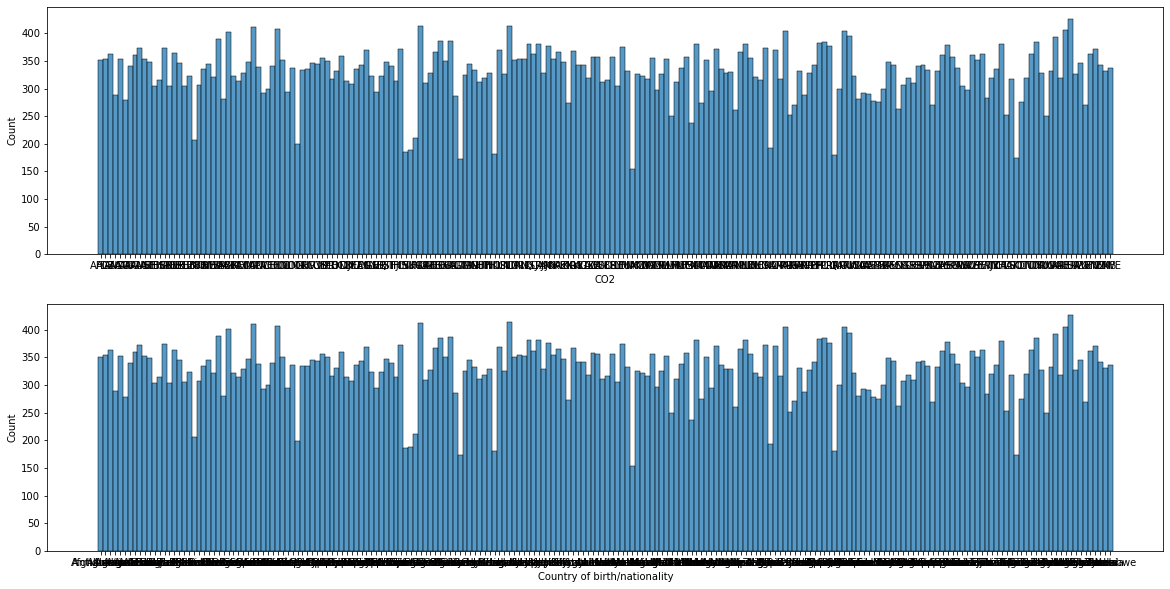

In [36]:
plt.figure(figsize=(20, 10))

plt.subplot(211)
sns.histplot(migration_inflows_raw.CO2)
plt.subplot(212)
sns.histplot(migration_inflows_raw['Country of birth/nationality'])

Las variables CO2 y Country of birth/nationality tienen la misma información, siendo C02 la abreviatura del país. Se decide eliminar la variable Country of birth/nationality y se modifica el nombre de C02 por Origin, haciendo referencia al país de origen.

Se elaborará un diccionario para definir cada abreviatura.

In [37]:
migration_inflows_raw.rename(columns={'CO2':'Origin'}, inplace=True)

In [38]:
migration_inflows_raw.head()

,Origin,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags
55,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUT,Austria,2000,2000,828.0,NaN,NaN
56,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUT,Austria,2001,2001,1539.0,NaN,NaN
57,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUT,Austria,2002,2002,1101.0,NaN,NaN
58,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUT,Austria,2003,2003,743.0,NaN,NaN
59,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUT,Austria,2004,2004,650.0,NaN,NaN


__Variables COU y Country__

In [39]:
migration_inflows_raw.COU.unique()

array(['AUT', 'BEL', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU', 'HUN', 'ISL',
       'ITA', 'LUX', 'NLD', 'NOR', 'POL', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'EST', 'SVN', 'GRC', 'PRT', 'IRL', 'LVA'],
      dtype=object)

In [40]:
migration_inflows_raw.Country.unique()

array(['Austria', 'Belgium', 'Czech Republic', 'Denmark', 'Finland',
       'France', 'Germany', 'Hungary', 'Iceland', 'Italy', 'Luxembourg',
       'Netherlands', 'Norway', 'Poland', 'Slovak Republic', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'Estonia',
       'Slovenia', 'Greece', 'Portugal', 'Ireland', 'Latvia'],
      dtype=object)

Se observa que estas dos variables siguen el mismo patrón que las de CO2 y Country of birth/nationality. Se procederá a realizar el mismo análisis para determinar la utilidad de las dos variables.

<AxesSubplot:xlabel='Country', ylabel='Count'>

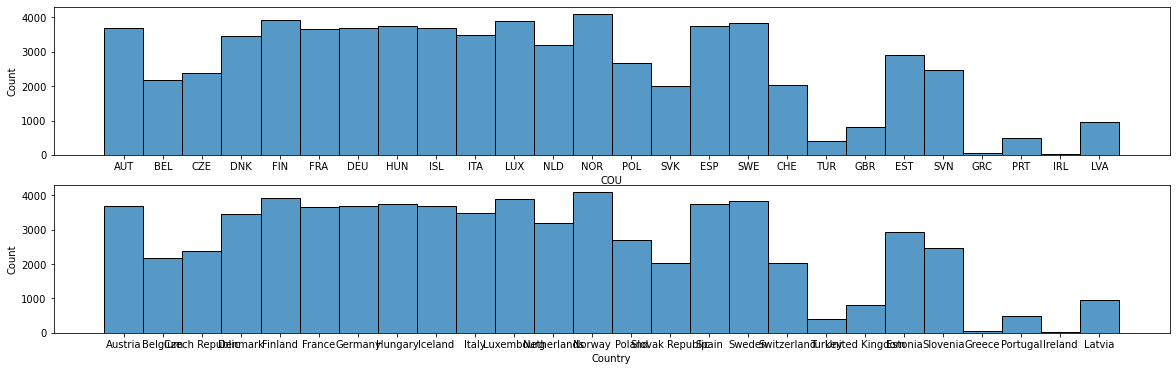

In [41]:
plt.figure(figsize=(20, 6))

plt.subplot(211)
sns.histplot(migration_inflows_raw.COU)
plt.subplot(212)
sns.histplot(migration_inflows_raw.Country)


Igual que anteriormente, COU es la abreviatura de Country y tiene la misma información. Se decide eliminar Country del dataset para trabajar con las abreviaturas de los países de destino. Se procede a cambiar el nombre de la variable COU por el de Destination.

Se elaborará un diccionario para definir cada abreviatura.

In [42]:
migration_inflows_raw.rename(columns={'COU':'Destination'}, inplace=True)

In [43]:
migration_inflows_raw.head()

,Origin,Country of birth/nationality,VAR,Variable,GEN,Gender,Destination,Country,YEA,Year,Value,Flag Codes,Flags
55,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUT,Austria,2000,2000,828.0,NaN,NaN
56,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUT,Austria,2001,2001,1539.0,NaN,NaN
57,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUT,Austria,2002,2002,1101.0,NaN,NaN
58,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUT,Austria,2003,2003,743.0,NaN,NaN
59,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUT,Austria,2004,2004,650.0,NaN,NaN


__Variables Flag Codes y Flags__

In [44]:
migration_inflows_raw['Flag Codes'].unique()

array([nan, 'e'], dtype=object)

In [45]:
migration_inflows_raw.Flags.unique()

array([nan, 'Estimated value'], dtype=object)

Se observa que posiblemente Flags sea una abreviación de Flag Codes. Ambas cuentan con dos valores, e y Estimated value se entiende que posiblemente se refieran a lo mismo. Además cuentan con valores nulos.

In [46]:
(migration_inflows_raw.Flags.isnull().sum()/ len(migration_inflows_raw))*100

99.96147349079808

In [47]:
(migration_inflows_raw['Flag Codes'].isnull().sum()/ len(migration_inflows_raw))*100

99.96147349079808

El porcentaje de valores nulos de esta variable es practicamente del 100 %, por lo que se decide eliminar ambas del dataset. Previamente, se analiza el valor donde Flag Code es igual a 'e'.

In [48]:
migration_inflows_raw[migration_inflows_raw['Flag Codes'] == 'e']

,Origin,Country of birth/nationality,VAR,Variable,GEN,Gender,Destination,Country,YEA,Year,Value,Flag Codes,Flags
5510,ATG,Antigua and Barbuda,B11,Inflows of foreign population by nationality,TOT,Total,BEL,Belgium,2010,2010,NaN,e,Estimated value
20051,BEL,Belgium,B11,Inflows of foreign population by nationality,TOT,Total,BEL,Belgium,2010,2010,NaN,e,Estimated value
21179,BLZ,Belize,B11,Inflows of foreign population by nationality,TOT,Total,BEL,Belgium,2010,2010,NaN,e,Estimated value
23660,BMU,Bermuda,B11,Inflows of foreign population by nationality,TOT,Total,BEL,Belgium,2010,2010,NaN,e,Estimated value
47664,COK,Cook Islands,B11,Inflows of foreign population by nationality,TOT,Total,BEL,Belgium,2010,2010,NaN,e,Estimated value
84966,GRD,Grenada,B11,Inflows of foreign population by nationality,TOT,Total,BEL,Belgium,2010,2010,NaN,e,Estimated value
85757,GUM,Guam,B11,Inflows of foreign population by nationality,TOT,Total,BEL,Belgium,2010,2010,NaN,e,Estimated value
93363,HKG,"Hong Kong, China",B11,Inflows of foreign population by nationality,TOT,Total,BEL,Belgium,2010,2010,NaN,e,Estimated value
111769,KIR,Kiribati,B11,Inflows of foreign population by nationality,TOT,Total,BEL,Belgium,2010,2010,NaN,e,Estimated value
120359,LSO,Lesotho,B11,Inflows of foreign population by nationality,TOT,Total,BEL,Belgium,2010,2010,NaN,e,Estimated value


Analizando los valores no nulos de las variables Flag Codes y Flags, se observan tres hechos:
 - Cuando las variables Flags y Flag Codes son no nulos, la variable Value es nulo. Esto es debido a que Flags y Flag Codes se refieren a situaciones en las que el valor no ha sido estimado, por lo que faltaría información en la variable Value.
 - La situación de valores no nulos en Flags y Flag Codes solo se da para Bélgica en el año 2010.
 - Existe la situación donde el origen y el destino es el mismo país, en este caso es en Bélgica. Dada esta información se debe estudiar si se da el mismo caso para el resto de países.

__Eliminación de las variables__

In [49]:
delete = ['Country of birth/nationality', 'VAR', 'Variable', 'GEN', 'Gender', 'Country', 'YEA', 'Flag Codes', 'Flags']

migration_inflows = migration_inflows_raw.drop(delete, axis = 1)

In [50]:
migration_inflows.head()

,Origin,Destination,Year,Value
55,AFG,AUT,2000,828.0
56,AFG,AUT,2001,1539.0
57,AFG,AUT,2002,1101.0
58,AFG,AUT,2003,743.0
59,AFG,AUT,2004,650.0


En primer lugar se realizará una explicación respecto a las variables que se han mantenido en la base de datos:

 - Origin: Representa el país de nacimiento o de nacionalidad de los migrantes. Se considera el luegar de origen.
 - Destination: Representa el país al que se han dirigido los migrantes.
 - Year: Representa el año en el que se produjeron los flujos migratorios.
 - Value: Representa la cantidad total de migrantes que se dirigieron al país de destino desde un origen y en el año indicado.
 - Coste: Representa la distancia en kilometros desde el país de origen al país de destino.

__Análisis de valores nulos__

In [51]:
((migration_inflows.iloc[:, 0:5].isnull().sum() / len(migration_inflows))*100).sort_values(ascending = False)

Value          0.038527
Year           0.000000
Destination    0.000000
Origin         0.000000
dtype: float64

La variable Value es la única que cuenta con valores núlos, esto es debido a lo visto anteriormente con las variables Flags y Flag Codes (se puede calcular la tendencia de migracion de esos países a Bélgica y aplicarla a esos años para que no haya una diferencia considerable, como hacer una predicción si tuviesemos solo datos hasta 2009).
Se decide modificar esos valores nulos eliminando las observaciones. Poner la media, ya que los flujos migratorios podrían sufrir una tendencia creciente o decreciente, sesgaría la información.

In [52]:
migration_inflows = migration_inflows.dropna()

__Crear variable de coste__

Carga de base de datos con las distancias entre países para después incluirla en el dataset de migration_inflows.

In [53]:
dist = pd.read_excel('../data/dist_cepii.xls')
dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50176 entries, 0 to 50175
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   iso_o    50176 non-null  object 
 1   iso_d    50176 non-null  object 
 2   dist     50176 non-null  float64
 3   distcap  50176 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.5+ MB


In [54]:
dist.head()

,iso_o,iso_d,dist,distcap
0,ABW,ABW,5.225315,5.225315
1,ABW,AFG,13257.810000,13257.810000
2,ABW,AGO,9516.913000,9516.913000
3,ABW,AIA,983.268200,983.268200
4,ABW,ALB,9091.742000,9091.742000


El dataset de distancias cuenta con 4 variables:
- __iso_o:__ País de origen.
- __iso_d:__ País de destino.
- __dist:__ Distancia entre las ciudades más pobladas de ambos países.
- __distcap:__ Distancia entre las capitales de ambos países.

La distancia a tener en cuenta será la distancia entre las ciudades más pobladas, ya que se puede esperar una mayor migración en estas ciudades y lo consideramos más representativo.

In [55]:
dist.iso_o.unique()

array(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ANT', 'ARE', 'ARG',
       'ARM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA',
       'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL',
       'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CCK', 'CHE',
       'CHL', 'CHN', 'CIV', 'CMR', 'COG', 'COK', 'COL', 'COM', 'CPV',
       'CRI', 'CUB', 'CXR', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA',
       'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESH', 'ESP', 'EST',
       'ETH', 'FIN', 'FJI', 'FLK', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR',
       'GEO', 'GHA', 'GIB', 'GIN', 'GLP', 'GMB', 'GNB', 'GNQ', 'GRC',
       'GRD', 'GRL', 'GTM', 'GUF', 'GUY', 'HKG', 'HND', 'HRV', 'HTI',
       'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA',
       'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA',
       'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LKA', 'LSO',
       'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MDA', 'MDG', 'MDV', 'MEX',
       'MHL', 'MKD',

In [56]:
dist.iso_d.unique()

array(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ANT', 'ARE', 'ARG',
       'ARM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA',
       'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL',
       'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CCK', 'CHE',
       'CHL', 'CHN', 'CIV', 'CMR', 'COG', 'COK', 'COL', 'COM', 'CPV',
       'CRI', 'CUB', 'CXR', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA',
       'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESH', 'ESP', 'EST',
       'ETH', 'FIN', 'FJI', 'FLK', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR',
       'GEO', 'GHA', 'GIB', 'GIN', 'GLP', 'GMB', 'GNB', 'GNQ', 'GRC',
       'GRD', 'GRL', 'GTM', 'GUF', 'GUY', 'HKG', 'HND', 'HRV', 'HTI',
       'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA',
       'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA',
       'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LKA', 'LSO',
       'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MDA', 'MDG', 'MDV', 'MEX',
       'MHL', 'MKD',

In [57]:
migration_inflows1 = pd.merge(migration_inflows, dist[['iso_o', 'iso_d','dist']],
                              how="left",
                              left_on=['Origin', 'Destination'],
                              right_on=['iso_o', 'iso_d'])

In [58]:
migration_inflows1 = migration_inflows1.drop(['iso_o', 'iso_d'], axis = 1)

In [59]:
migration_inflows1.head()

,Origin,Destination,Year,Value,dist
0,AFG,AUT,2000,828.0,4568.098
1,AFG,AUT,2001,1539.0,4568.098
2,AFG,AUT,2002,1101.0,4568.098
3,AFG,AUT,2003,743.0,4568.098
4,AFG,AUT,2004,650.0,4568.098


Guardar la base de datos ya limpia

In [60]:
migration_inflows1.to_csv('../data/migration_inflows.csv', index = False)